In [1]:
import tensorflow.keras as tk

mnist = tk.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(len(train_images), len(test_images))

60000 10000


In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(train_labels.shape)

(60000,)


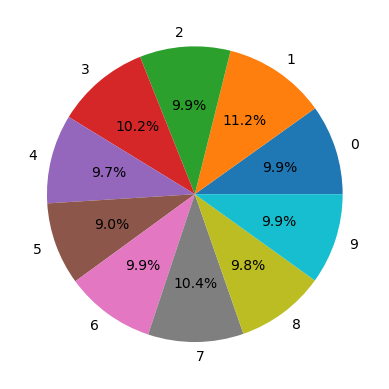

In [4]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, value_counts = np.unique(train_labels, return_counts=True)

plt.pie(value_counts, labels=unique_values, autopct='%1.1f%%')

plt.show()

In [5]:
print(train_images[0].shape)

(28, 28)


In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

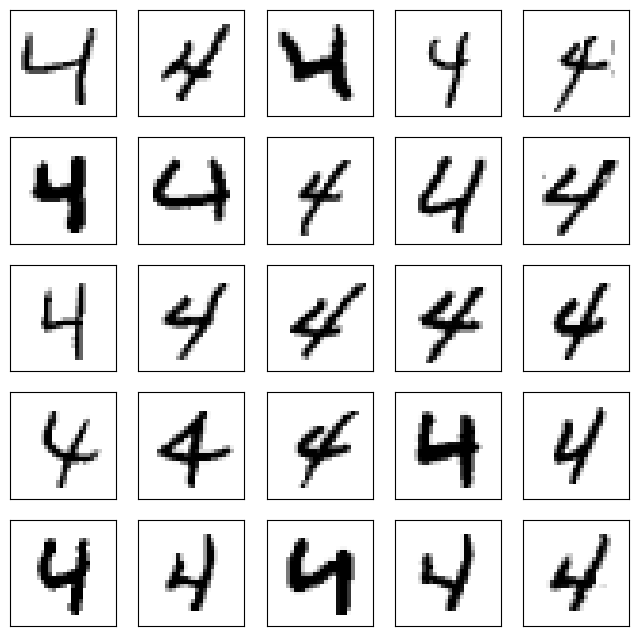

In [7]:
max_4 = 25

images_4 = []

for i in range(len(train_labels)):
    if train_labels[i] == 4:
        images_4.append(train_images[i])
        
        if len(images_4) == max_4:
            break

rows = 5

cols = 5

plt.figure(figsize=(8, 8))

for i in range(max_4):
    plt.subplot(rows, cols, i+1)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(images_4[i], cmap=plt.cm.binary)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tk.Sequential([
    tk.layers.Flatten(input_shape=(28, 28)),
    tk.layers.Dense(units=512, activation='relu'),
    tk.layers.Dense(units=256, activation='relu'),
    tk.layers.Dense(units=128, activation='relu'),
    tk.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5915 - accuracy: 0.8048
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2610 - accuracy: 0.9204
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1776 - accuracy: 0.9454
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1336 - accuracy: 0.9589
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0902 - accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0763 - accuracy: 0.9761
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0661 - accuracy: 0.9787
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0571 - accuracy: 0.9816
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9743
Test accuracy: 0.9743000268936157


313/313 [==============================] - 1s 1ms/step


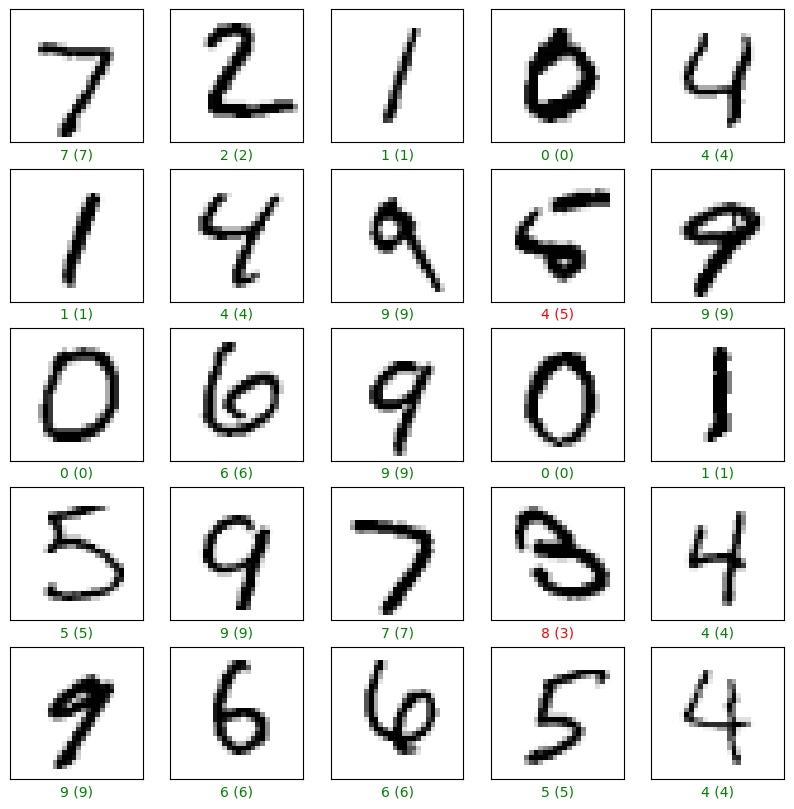

In [12]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions[i])
    
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()